In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("myexcel.csv")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


# Preproccesing 

### Primary analysis and cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [6]:
data.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
data.describe(include = 'all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [8]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [9]:
data[data.isnull().any(axis=1)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44,SG,27,06-Aug,216,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10,SG,22,06-Jul,208,NaN,1599840.0
...,...,...,...,...,...,...,...,...,...
445,Dante Exum,Utah Jazz,11,PG,20,06-Jun,190,NaN,3777720.0
447,Rudy Gobert,Utah Jazz,27,C,23,07-Jan,245,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2,SF,28,06-Aug,226,NaN,2050000.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0


In [10]:
data.shape

(458, 9)

In [11]:
data.isnull().sum()/len(data)*100

Name         0.000000
Team         0.000000
Number       0.000000
Position     0.000000
Age          0.000000
Height       0.000000
Weight       0.000000
College     18.340611
Salary       2.401747
dtype: float64

In [12]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      365 non-null    object 
 1   Team      365 non-null    object 
 2   Number    365 non-null    int64  
 3   Position  365 non-null    object 
 4   Age       365 non-null    int64  
 5   Height    365 non-null    object 
 6   Weight    365 non-null    int64  
 7   College   365 non-null    object 
 8   Salary    365 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 28.5+ KB


### Correct Height Column

In [14]:
data['Height'].value_counts()

Height
06-Sep    49
06-Jul    37
06-Aug    36
06-Jun    36
06-Oct    32
06-Nov    29
06-May    29
06-Apr    28
06-Mar    25
7-0       20
06-Feb    13
06-Jan    12
6-0       10
05-Nov     3
07-Jan     3
05-Sep     1
07-Feb     1
07-Mar     1
Name: count, dtype: int64

In [15]:
data['Height'] = np.random.randint(150, 181, size=len(data))

In [16]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,154,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,174,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55,PF,21,159,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,171,238,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,153,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,152,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,169,203,Butler,2433333.0
456,Jeff Withey,Utah Jazz,24,C,26,158,231,Kansas,947276.0


# Analysis Tasks

### Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.


In [19]:
team_percent =data['Team'].value_counts().reset_index()
team_percent.columns = ['Team', 'Count']
team_percent

,Team,Count
0,New Orleans Pelicans,16
1,Portland Trail Blazers,15
2,Detroit Pistons,15
3,Milwaukee Bucks,14
4,Philadelphia 76ers,14
5,Oklahoma City Thunder,14
6,Los Angeles Clippers,14
7,Washington Wizards,13
8,Charlotte Hornets,13
9,Phoenix Suns,13


In [20]:
team_percent["Percent"]=((team_percent["Count"]/len(data))*100).round(2)
team_percent

,Team,Count,Percent
0,New Orleans Pelicans,16,4.38
1,Portland Trail Blazers,15,4.11
2,Detroit Pistons,15,4.11
3,Milwaukee Bucks,14,3.84
4,Philadelphia 76ers,14,3.84
5,Oklahoma City Thunder,14,3.84
6,Los Angeles Clippers,14,3.84
7,Washington Wizards,13,3.56
8,Charlotte Hornets,13,3.56
9,Phoenix Suns,13,3.56


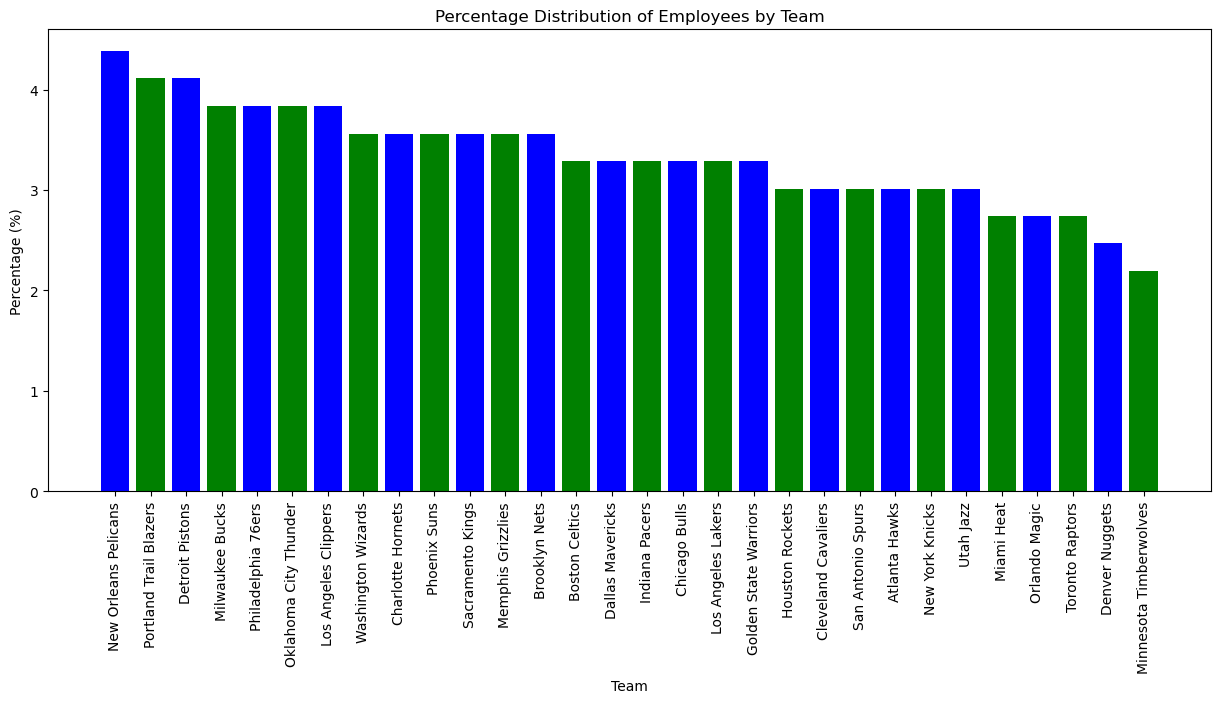

In [21]:
plt.figure(figsize=(15, 6))
plt.bar(team_percent['Team'], team_percent['Percent'], color=['blue', 'green'])
plt.title('Percentage Distribution of Employees by Team')
plt.xlabel('Team')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

plt.show()

***This chart displays the percentage of employees across different teams.
It highlights teams with the highest and lowest employee representation, making it easy to identify teams with more or fewer players.***


### Segregate employees based on their positions within the company

In [23]:

pos_distribution = data['Position'].value_counts().reset_index()
pos_distribution.columns = ['Position', 'Count']

total_employees = len(data)
pos_distribution['Percentage'] = round(((pos_distribution['Count'] / total_employees) * 100),2)
print(pos_distribution)


  Position  Count  Percentage
0       SG     87       23.84
1       PF     81       22.19
2       PG     76       20.82
3       SF     71       19.45
4        C     50       13.70


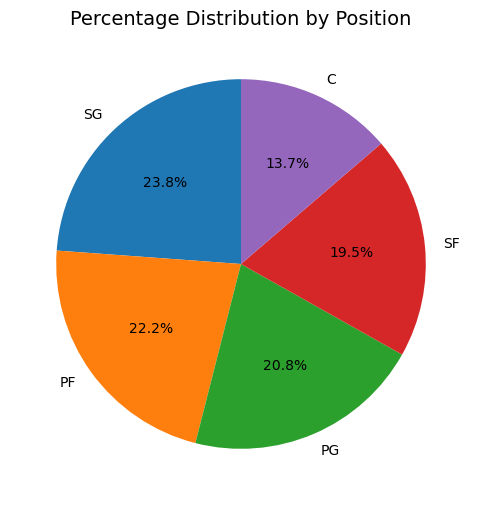

In [24]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(pos_distribution['Percentage'], labels=pos_distribution['Position'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution by Position', fontsize=14)
plt.show()

***The pie chart shows the distribution of employees by positions: Center (C), Shooting Guard (SG), Point Guard (PG), Power Forward (PF), and Small Forward (SF).
Positions like SG and PF dominate the distribution, while Center (C) has the smallest share.***

### Identify the predominant age group among employees

In [26]:
data['Age'].max()

40

In [27]:
age_count =data['Age'].value_counts().reset_index()
age_count

,Age,count
0,25,42
1,24,41
2,27,35
3,23,33
4,26,32
5,28,27
6,22,23
7,30,20
8,29,17
9,31,17


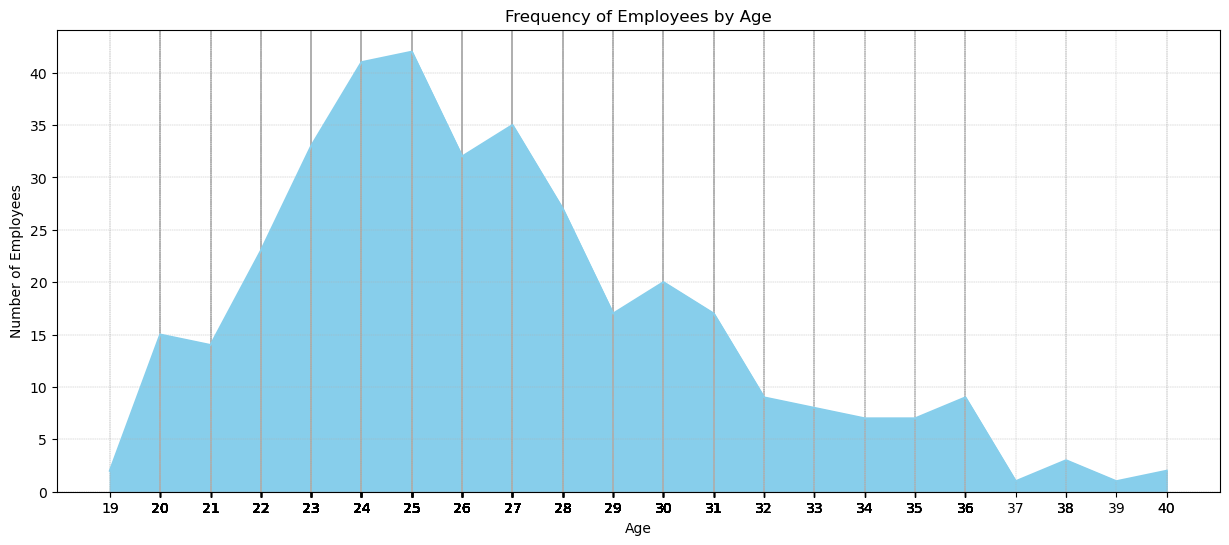

In [96]:
age_count = data['Age'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
age_count.plot(kind='area', color='skyblue')

plt.title('Frequency of Employees by Age')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.xticks(ticks=data['Age'], rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.3) 
plt.show()

***This chart reveals the age distribution of employees.
Most employees are aged between 23 and 28, indicating a concentration of younger athletes in the dataset.***

### Discover which team and position have the highest salary expenditure

In [30]:
team_pos_salary=pd.DataFrame(data.groupby('Team')['Salary'].mean().sort_values(ascending = False).apply(lambda x: f"{x:.2f} M"))
team_pos_salary

,Salary
Team,
Cleveland Cavaliers,6733471.73 M
Golden State Warriors,6711293.08 M
Los Angeles Clippers,6707636.71 M
Miami Heat,6583812.10 M
Chicago Bulls,6105483.33 M
Oklahoma City Thunder,5822521.29 M
Toronto Raptors,5737712.90 M
San Antonio Spurs,5408293.91 M
New York Knicks,5270654.73 M


In [31]:
Pos_salary=pd.DataFrame(data.groupby('Position')['Salary'].mean().sort_values(ascending = False).apply(lambda x: f"{x:.2f} M"))
Pos_salary

,Salary
Position,
C,5667535.02 M
PG,4916069.18 M
SF,4595907.62 M
PF,4459987.91 M
SG,3887057.87 M


In [74]:
poswiseteam_salary = data.groupby(['Position', 'Team'])['Salary'].max().sort_values(ascending=False).reset_index()
poswiseteam_salary

,Position,Team,Salary
0,SF,New York Knicks,22875000.0
1,PF,Miami Heat,22192730.0
2,PG,Los Angeles Clippers,21468695.0
3,SF,Oklahoma City Thunder,20158622.0
4,PG,Chicago Bulls,20093064.0
...,...,...,...
137,SF,Cleveland Cavaliers,947276.0
138,PF,Sacramento Kings,845059.0
139,SF,Orlando Magic,845059.0
140,SF,Milwaukee Bucks,295327.0


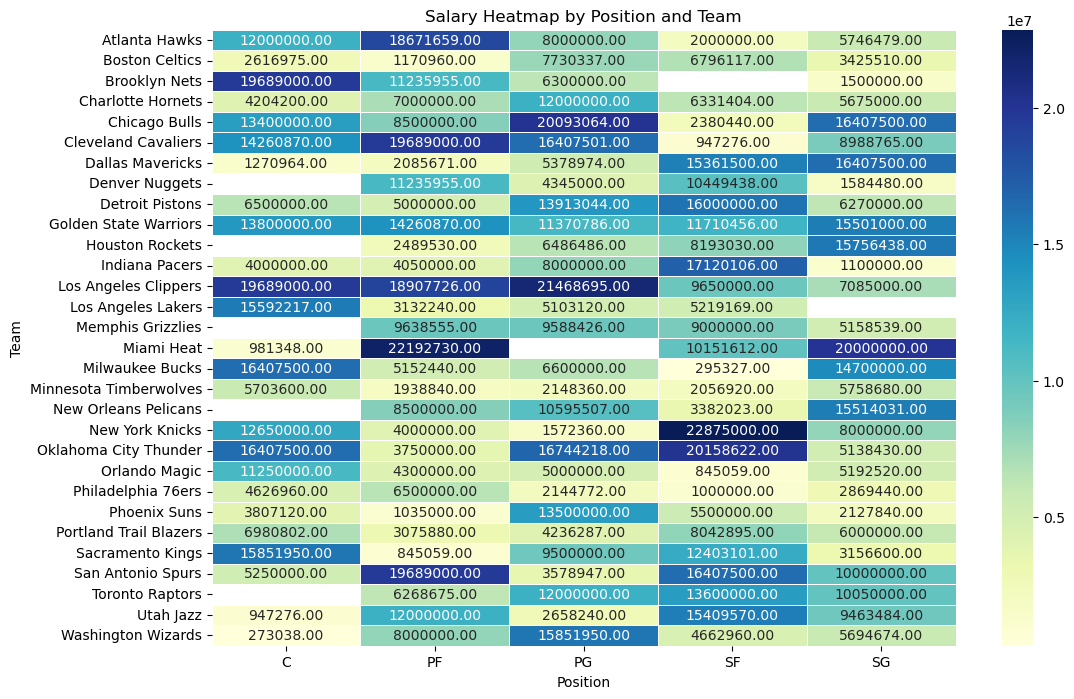

In [72]:
pivot_df = poswiseteam_salary.pivot(index='Team', columns='Position', values='Salary')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Salary Heatmap by Position and Team')
plt.show()

***The heatmap displays total salary expenditures across teams and positions.
It helps identify which teams and positions have the highest salary outlays. For example, some teams spend significantly more on certain positions.***

### Investigate if there's any correlation between age and salary, and represent it visually

In [88]:
pearson_corr = data['Age'].corr(data['Salary'])
print(f"Pearson Correlation: {pearson_corr}")


Pearson Correlation: 0.15999189342806175


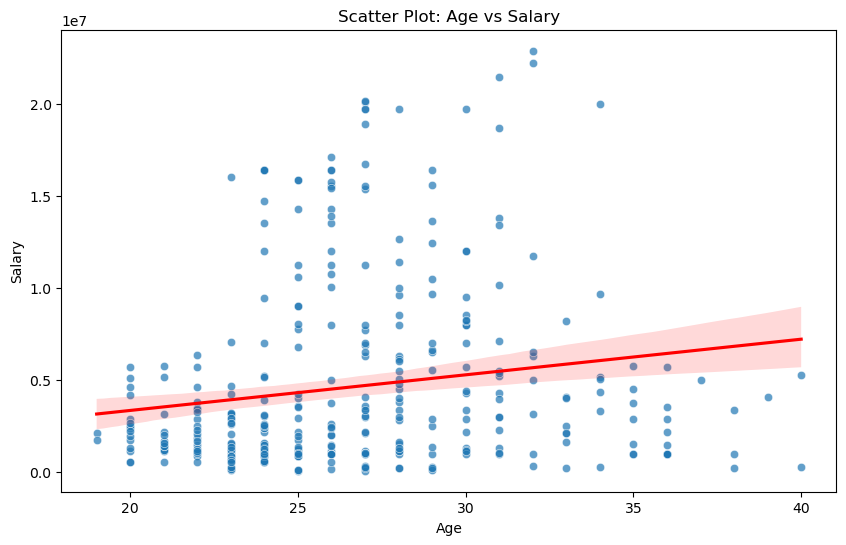

In [78]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Salary', alpha=0.7)
sns.regplot(data=data, x='Age', y='Salary', scatter=False, color='red')  
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

***This scatter plot investigates the relationship between age and salary.
A slight positive correlation is observed, showing that older players generally earn higher salaries, though exceptions exist.***

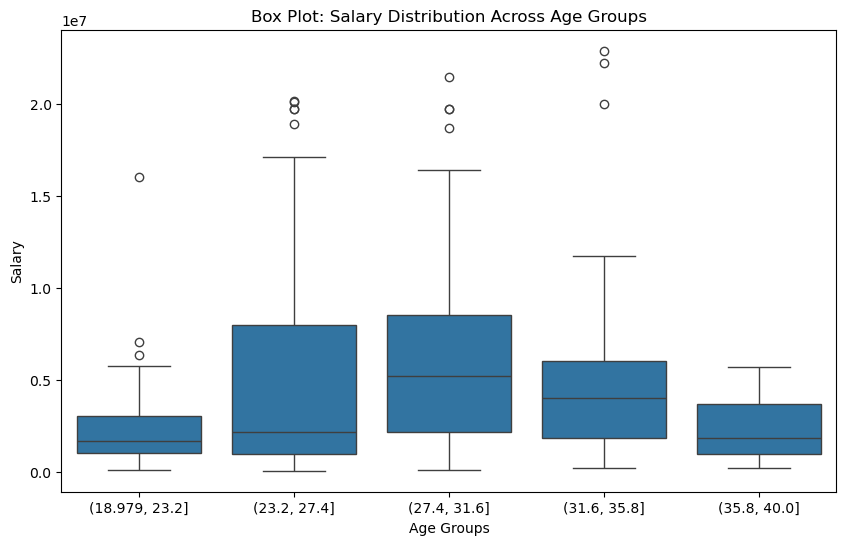

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=pd.cut(data['Age'], bins=5), y='Salary')
plt.title('Box Plot: Salary Distribution Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Salary')
plt.show()

***Salaries generally increase for players aged 23 to 31 as the median salary rises, indicating this group is likely in their peak earning years.
The 23.2–27.4 and 27.4–31.6 age ranges exhibit wider spreads with more high earners and outliers, suggesting that players in these groups include top performers receiving higher salaries.
For younger players (18.9–23.2), salaries are lower and tightly clustered, indicating limited experience and lower earnings.
Older players (31.6–35.8 and 35.8–40) have smaller salary distributions with fewer high outliers, implying fewer players maintain elite pay levels as they age.
Overall, the plot highlights that salary peaks during mid-career (ages 23–31) and declines afterward.***

# Concluding Story

***The analysis highlights a competitive landscape where Shooting Guards play a pivotal role, both in numbers and salary. Younger talent dominates the workforce, and while age correlates with salary, it isn't the sole determinant. Top-performing teams invest strategically in high-value positions, creating disparities in salary distribution across the league.***